In [398]:
# limit for 2 tag
import ROOT as rt
import math
# import root_numpy as rtnp
import csv
import re
import sys
import collections
import os
from collections import OrderedDict
import uproot
import pandas as pd

import scipy
import awkward
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
sys.path.append('/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/lib/')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot
from limit_plots import *
import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()

print(sys.version)

3.6.8 (default, Aug  7 2019, 17:28:10) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


# Load ntuples

In [479]:
limitTrees =OrderedDict()
dataCards = OrderedDict()

limitTrees_obs =OrderedDict()
dataCards_obs = OrderedDict()
limitTrees_hybridNew = OrderedDict()

version = '/V1p17/v2/v163/'
dc_version = 'v9'

nrechit = 100

mode = 'allProd_withggZH'
decay = '4Tau'
decay = 'dddd'
decay = 'bbbb'

samples = [
# 'allProd_withggZH_HToSS_SToEE_ms4p0',
'allProd_withggZH_HToSS_SToEE_ms0p4',
'allProd_withggZH_HToSS_SToGammaGamma_ms0p4',
# 'allProd_withggZH_HToSS_SToGammaGamma_ms4p0',
'allProd_withggZH_HToSS_SToKPlusKMinus_ms1p5',
'allProd_withggZH_HToSS_SToK0K0_ms1p5',
'allProd_withggZH_HToSS_SToPi0Pi0_ms0p4',
'allProd_withggZH_HToSS_SToPi0Pi0_ms1p0',
'allProd_withggZH_HToSS_SToPiPlusPiMinus_ms0p4',
'allProd_withggZH_HToSS_SToPiPlusPiMinus_ms1p0',
# 'allProd_withggZH_HToSS_SToPiPlusPiMinus_ms4p0',
'allProd_withggZH_HToSS_STodd_ms3p0',
'allProd_withggZH_HToSS_STodd_ms7',
'allProd_withggZH_HToSS_STodd_ms15',
'allProd_withggZH_HToSS_STodd_ms40',
'allProd_withggZH_HToSS_STodd_ms55',
'allProd_withggZH_HToSS_SToTauTau_ms7',
'allProd_withggZH_HToSS_SToTauTau_ms15',
'allProd_withggZH_HToSS_SToTauTau_ms40',
'allProd_withggZH_HToSS_SToTauTau_ms55',
'allProd_withggZH_HToSS_SToBB_ms15',
'allProd_withggZH_HToSS_SToBB_ms40',
'allProd_withggZH_HToSS_SToBB_ms55'
]


methodA = False
unblind = 'unblindABC'
hybridNew = 0
category = '/all_cat/'

# category = '/csc_twotag/'

limitDir = '/storage/af/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/limitTrees_2tag/'+version+'/'+dc_version+'/'
dataCardDir = '/storage/af/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/datacards_2tag/'+version+'/'+dc_version+'/'
hybridNewDir = '/storage/af/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/hybridNew/'+version+'/'+dc_version+'/'


lumi = 137000
nCsc = 100
nDt = 80

ctaus = np.array([0.1, 0.125, 0.15, 0.175, 0.2,0.25,0.3,0.35,0.4,0.5,0.6,0.7,0.8,0.9, 1,1.25, 1.5, 1.75, 2,2.25,2.5,2.75,3,3.25,3.5,3.75, 4,5, 6,7,8,9,10, 11,12,13,14,15, 16,17,18,19,20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 125, 150, 175, 200, 225, 250, 275, 300,325, 350, 375, 400, 425, 450, 475, 500, \
                  600,700,800, 900, 1000, 1250, 1500, 1750, 2000,2250, 2500, 2750, \
                  3000, 3250, 3500, 3750, 4000, 5000, 6000, 7000, 8000, 9000,\
                  10000, 15000, 20000, 30000, 100000,int(2e5),int(3e5),\
                        int(2e6),int(3e6),int(5e6),int(1e7)]) #v12


if decay == 'bbbb': mass = np.array([ 15, 40, 55])
else:mass = np.array([ 7, 15, 40, 55])

### limit branch: 2.5, 16.0, 50.0, 84.0, 97.5, obs
expected = ['0.025', '0.160','0.500','0.840','0.975']


for m in samples:
    limitTrees[m] = {}
    dataCards[m] = {}
    limitTrees_hybridNew[m] = {}
    for ct in ctaus:
        name = mode+'_HToSSTo'+decay
#         dataCards[m][ct] = dataCardDir + '/'+unblind+category+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nRechit'+ str(nrechit)+'.txt'
#         if unblind=='unblind':limitTrees[m][ct] = limitDir + '/'+unblind+'/obs/higgsCombine.'+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nRechit'+ str(nrechit)+'.AsymptoticLimits.mH120.root'
#         else:limitTrees[m][ct] = limitDir + '/'+unblind+category+'/higgsCombine.'+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nRechit'+ str(nrechit)+'.AsymptoticLimits.mH120.root'
#         if hybridNew:
#             limitTrees[m][ct] = []
#             for i in range(6):
#                 if i == 5:limitTrees[m][ct].append(hybridNewDir +'/'+unblind+'/higgsCombine.'+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nRechit'+ str(nrechit)+ dphi+'.T2000.HybridNew.mH120.root')
#                 else:limitTrees[m][ct].append(hybridNewDir +'/'+unblind+'/higgsCombine.'+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nRechit'+ str(nrechit)+ dphi+'.T2000.HybridNew.mH120.quant'+expected[i]+'.root')

#         dataCards[m][ct] = dataCardDir + '/'+unblind+category+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nCsc'+ str(nCsc)+'_nDt'+str(nDt)+'.txt'
        ct_str = str(ct).replace('.','p')
        if ct == int(ct):ct_str = str(int(ct)).replace('.','p')
        else: ct_str = str(ct).replace('.','p')
        dataCards[m][ct] = dataCardDir + '/'+unblind+category+m+'_ctau'+ct_str+'mm_nCsc'+ str(nCsc)+'_nDt'+str(nDt)+'.txt'
        limitTrees[m][ct] = limitDir + '/'+unblind+category+'/higgsCombine.'+m+'_ctau'+ct_str+'mm_nCsc'+ str(nCsc)+'_nDt'+str(nDt)+'.AsymptoticLimits.mH120.root'

#         if unblind=='unblind':limitTrees[m][ct] = limitDir + '/'+unblind+'/obs/higgsCombine.'+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nCsc'+ str(nCsc)+'_nDt'+str(nDt)+'.AsymptoticLimits.mH120.root'
#         else:limitTrees[m][ct] = limitDir + '/'+unblind+category+'/higgsCombine.'+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nCsc'+ str(nCsc)+'_nDt'+str(nDt)+'.AsymptoticLimits.mH120.root'
        if hybridNew:
            limitTrees[m][ct] = []
            for i in range(6):
                if i == 5:limitTrees[m][ct].append(hybridNewDir +'/'+unblind+'/higgsCombine.'+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nCsc'+ str(nCsc)+'_nDt'+str(nDt)+ dphi+'.T2000.HybridNew.mH120.root')
                else:limitTrees[m][ct].append(hybridNewDir +'/'+unblind+'/higgsCombine.'+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nCsc'+ str(nCsc)+'_nDt'+str(nDt)+ dphi+'.T2000.HybridNew.mH120.quant'+expected[i]+'.root')


norms = []
limits = {}
for i,m in enumerate(limitTrees.keys()):
    if unblind == 'blind' or unblind == 'unblindABC': limits[m] = np.ones((len(ctaus), 5))*1000000
    else:limits[m] = np.ones((len(ctaus), 6))*1000000
    for j, k in enumerate(limitTrees[m].keys()):
#         if not os.path.isfile(dataCards[m][k]):continue

#         if not os.path.isfile(limitTrees[m][k]):continue

        line = open(dataCards[m][k], "r").readline()
        if not line.split(" ")[0] == '#' :continue
        signal_norm = float(line.split(" ")[3])
        
        if signal_norm == 0:continue
        if hybridNew:
            for n in range(6):
                if len(uproot.open(limitTrees[m][k][n]).keys()) == 2:
                    T = uproot.open(limitTrees[m][k][n])['limit']
                    if len(np.array(T.array('limit'))>0):limits[m][j][n] = np.array(T.array('limit'))/signal_norm
                
        else:
            if len(uproot.open(limitTrees[m][k]).keys()) == 2:
                T = uproot.open(limitTrees[m][k])['limit']                
                if len(np.array(T.array('limit'))>0):limits[m][j] = np.array(T.array('limit'))/signal_norm
    limits[m] = np.array(limits[m])

print(ctaus)



[1.00e-01 1.25e-01 1.50e-01 1.75e-01 2.00e-01 2.50e-01 3.00e-01 3.50e-01
 4.00e-01 5.00e-01 6.00e-01 7.00e-01 8.00e-01 9.00e-01 1.00e+00 1.25e+00
 1.50e+00 1.75e+00 2.00e+00 2.25e+00 2.50e+00 2.75e+00 3.00e+00 3.25e+00
 3.50e+00 3.75e+00 4.00e+00 5.00e+00 6.00e+00 7.00e+00 8.00e+00 9.00e+00
 1.00e+01 1.10e+01 1.20e+01 1.30e+01 1.40e+01 1.50e+01 1.60e+01 1.70e+01
 1.80e+01 1.90e+01 2.00e+01 2.50e+01 3.00e+01 3.50e+01 4.00e+01 4.50e+01
 5.00e+01 5.50e+01 6.00e+01 6.50e+01 7.00e+01 7.50e+01 8.00e+01 8.50e+01
 9.00e+01 9.50e+01 1.00e+02 1.25e+02 1.50e+02 1.75e+02 2.00e+02 2.25e+02
 2.50e+02 2.75e+02 3.00e+02 3.25e+02 3.50e+02 3.75e+02 4.00e+02 4.25e+02
 4.50e+02 4.75e+02 5.00e+02 6.00e+02 7.00e+02 8.00e+02 9.00e+02 1.00e+03
 1.25e+03 1.50e+03 1.75e+03 2.00e+03 2.25e+03 2.50e+03 2.75e+03 3.00e+03
 3.25e+03 3.50e+03 3.75e+03 4.00e+03 5.00e+03 6.00e+03 7.00e+03 8.00e+03
 9.00e+03 1.00e+04 1.50e+04 2.00e+04 3.00e+04 1.00e+05 2.00e+05 3.00e+05
 2.00e+06 3.00e+06 5.00e+06 1.00e+07]


# Expected Limit only (blinded)

EE 0.01 15
50
80
50 80
ERROR: no curve drawn for contour 1 
GammaGamma 0.01 15
50
80
50 80
ERROR: no curve drawn for contour 1 
KPlusKMinus 1 15
50
80
50 80
K0K0 1 15
50
80
50 80
Pi0Pi0 0.3 15
50
80
50 80
ERROR: no curve drawn for contour 1 
PiPlusPiMinus 0.31 15
50
80
50 80
dd 0.01 15
50
80
50 80
TauTau 4 15
50
80
50 80
ERROR: no curve drawn for contour 1 
BB 9 15
49
80
50 80


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Info in <TCanvas::Print>: png file /storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/double_tag/limits//V1p17/v2/v163//v9/unblindABC/allProd_withggZH_HToSSToEE_2d_expected.png has been created
Info in <TCanvas::SaveSource>: C++ Macro file: /storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/double_tag/limits//V1p17/v2/v163//v9/unblindABC/allProd_withggZH_HToSSToEE_2d_expected.C has been generated
Info in <TCanvas::Print>: pdf file /storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/double_tag/limits//V1p17/v2/v163//v9/unblindABC/allProd_withggZH_HToSSToEE_2d_expected.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/af/user/christiw/gpu/christi

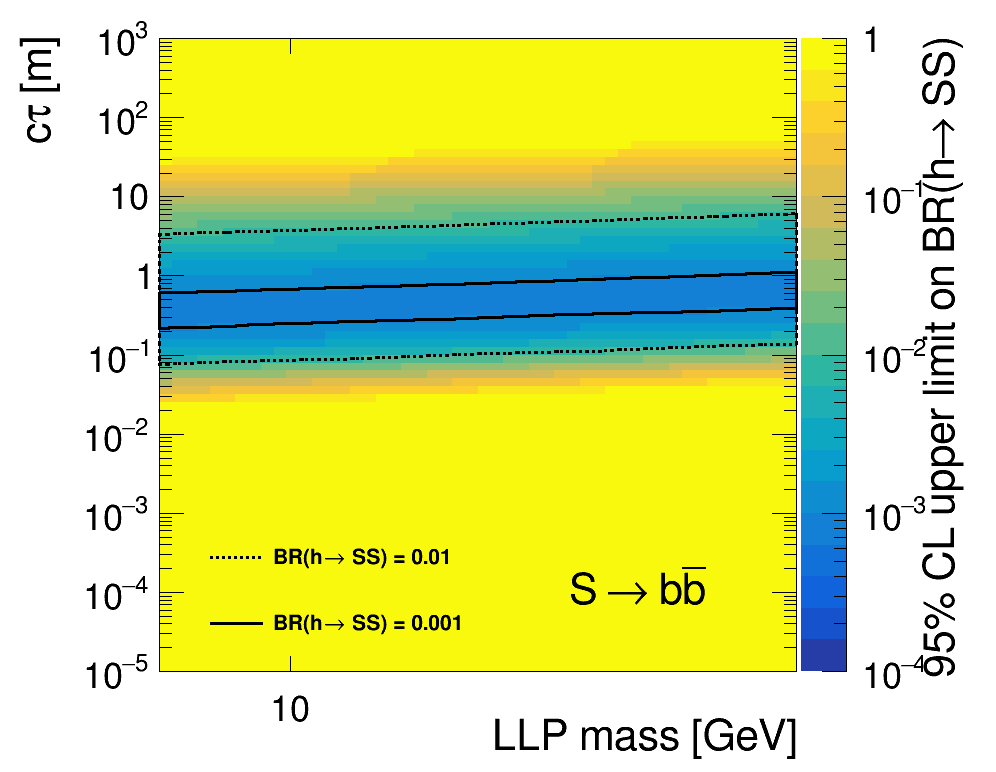

In [87]:
import os
import importlib
importlib.reload(sys.modules['CMS_lumi'])


decays =['EE', 'GammaGamma', 'KPlusKMinus', 'K0K0', 'Pi0Pi0', 'PiPlusPiMinus', 'dd', 'TauTau', 'BB']

opac_1sig = 0.25
opac_2sig = 0.1
for decay in decays:
#     if not decay == 'PiPlusPiMinus':continue
#     print(decay)
#     leg = rt.TLegend(0.48,0.15,0.75,0.32)

    leg = rt.TLegend(0.2,0.15,0.5,0.32)

    leg.SetFillStyle(0)

    leg.SetTextSize(0.03)
    leg.SetBorderSize(0)
    rt.gStyle.SetLegendFillColor(1)
    leg.SetEntrySeparation(0.01)
#     leg2.SetTextSize(0.032)
#     leg2.SetBorderSize(0)
#     leg2.SetEntrySeparation(0.01)
    c = rt.TCanvas('c','c', 1000, 800)
    c.SetRightMargin(0.04)

    rt.gStyle.SetOptFit(1011)
    ctaus_m = ctaus/1000
#     print(ctaus_m)
#     h = create_TH2D(np.column_stack((np.array(0), np.array(0))), axis_title = ['LLP mass [GeV]','log10(c#tau)',''], binning = [300,0,30,100,-4,3])
    sample_temp = []
    m_sample = []
    x = array('d',[])
    y = array('d',[])
    z = array('d',[])
    for m in samples:
        if decay in m:
            m_sample.append(float(m[m.find('ms')+2:].replace('p','.')))
            sample_temp.append(m)
    ### set min and max mass range
#     if decay == 'dd' or decay == 'TauTau' or decay == 'BB': max_mass = 15
#     elif decay == 'EE' or decay == 'GammaGamma': max_mass = 1
#     elif 'K' in decay or 'Pi' in decay: max_mass = 4
    
#     else: max_mass = np.max(m_sample)
    max_mass = 15    
    if decay == 'dd': min_mass = 0.01 # mass is 0.0047 GeV
    elif decay == 'BB': min_mass = 9 # mass is 4.18 GeV
    elif decay == 'TauTau': min_mass = 4 # mass is 1.77 GeV
    elif decay == 'EE': min_mass = 0.01 # mass is 0.511 MeV
    elif decay == 'GammaGamma': min_mass = 0.01 
    elif decay == 'KPlusKMinus': min_mass = 1 # mass is 0.493 GeV
    elif decay == 'K0K0': min_mass = 1 # mass is 0.497 GeV
    elif decay == 'Pi0Pi0': min_mass = 0.3 # mass is 0.134 GeV
    elif decay == 'PiPlusPiMinus': min_mass = 0.31 # mass is 0.139 GeV

    print(decay, min_mass, max_mass)
    h = create_TH2D(np.column_stack((np.array(0), np.array(0))), axis_title = ['LLP mass [GeV]','c#tau [m]','95% CL upper limit on BR(h#rightarrow SS)'], \
                    binning = [50,math.log10(min_mass),math.log10(max_mass),80,-5,3])

    for logm in np.arange(-3,2,0.1):
        m = 10.0**float(logm)
        if m >40 and m <55:continue
        if m == 0:continue
        use_m_s = 0.0
        if m>np.max(m_sample): 
            use_m_s = np.max(m_sample)
            index = np.argmax(m_sample)
        else:
            for i, m_s in enumerate(m_sample):
                if m <= m_s:
                    use_m_s = m_s
                    index = i
                    break
        cond = limits[sample_temp[index]][:,2] < 10000
        if decay == 'EE':cond = np.logical_and(cond, np.logical_not(ctaus_m==0.001))
        if decay == 'Pi0Pi0':cond = np.logical_and(cond, np.logical_not(ctaus_m==0.125))
        if decay == 'PiPlusPiMinus':
            cond = np.logical_and(cond, np.logical_not(ctaus_m==0.003))
            cond = np.logical_and(cond, np.logical_not(ctaus_m==0.002))
        for j in range(len(ctaus_m[cond])):
            if ctaus_m[cond][j]/1.0*use_m_s*m == 0.0:continue
#             print(m, float(m))
            x.append(math.log10(float(m)))
            y.append(math.log10(ctaus_m[cond][j]/use_m_s*m))
            z.append(math.log10(limits[sample_temp[index]][:,2][cond][j]))
#             print(x,y,z)
#             print(m, use_m_s, ctaus_m[cond][j], ctaus_m[cond][j]/1.0*use_m_s*m)
#             h.SetBinContent(h.GetXaxis().FindBin(float(m)), h.GetYaxis().FindBin(math.log10(ctaus_m[cond][j]/1.0*use_m_s*m)),limits[sample_temp[index]][:,2][cond][j])
            h.SetBinContent(h.GetXaxis().FindBin(math.log10(float(m))), h.GetYaxis().FindBin(math.log10(ctaus_m[cond][j]/1.0*use_m_s*m)),limits[sample_temp[index]][:,2][cond][j])
#     #     print(x,y,z)
    h = interpolate2D(x,y,z, h, 0.2,1)
    
    tdrstyle.setTDRStyle()
    
    
    
        
    #############
    # plot contour
    #############

    contours = array('d',[0.001, 0.01])
    hframed = frameTH2D(h)
#     hframed = h.Clone()

    hframed = log_scale_conversion(hframed)
    hframed.SetContour(len(contours),contours)
    hframed.SetMaximum(1)
    hframed.SetMinimum(0.0001)
    hframed.Draw("CONT Z LIST")

    rt.gPad.Update()

    h = log_scale_conversion(h)
    h.SetMinimum(1e-4)
    h.SetMaximum(1) 
    h.Draw('colz')

    
    conts = rt.gROOT.GetListOfSpecials().FindObject("contours")
    cont_gr = []
    for i in range(conts.GetSize()):
        contour0 = conts.At(i)
        curv = contour0.First()
        finalcurv = rt.TGraph(1)
#         print(contours_plotted)
        try:
            curv.SetLineWidth(3)
            curv.SetLineColor(std_color_list[0])
            curv.SetLineStyle(std_color_list[i])

            curv.Draw("lsame")
            finalcurv = curv.Clone()
            maxN = curv.GetN()
            for i in range(1, contour0.GetSize()):
                curv = contour0.After(curv)
                curv.SetLineWidth(3)
                curv.SetLineColor(rt.kBlack)
                curv.Draw("lsame")
                if curv.GetN()>maxN:
                    maxN = curv.GetN()
                    finalcurv = curv.Clone()
            cont_gr.append(finalcurv)
        except AttributeError:
            print ("ERROR: no curve drawn for contour %s "%(i))
    for idex in range(len(cont_gr)):
        i = len(cont_gr)-idex-1
        leg.AddEntry(cont_gr[i],'BR(h#rightarrow SS) = '+str(contours[len(contours)-idex-1]), 'L')
        finalcurv.Draw('lsame')



    latex = rt.TLatex()
    latex.SetTextSize(0.06)
    latex.SetTextFont(42)

    if decay == 'dd': latex.DrawLatex(max_mass/10,0.00007,  "S #rightarrow d#bar{d}")
    elif decay == 'BB': latex.DrawLatex(max_mass/1.2,0.00007, "S #rightarrow b#bar{b}")
    elif decay == 'TauTau': latex.DrawLatex(max_mass/1.5,0.00007, "S #rightarrow #tau^{+}#tau^{-}")
    elif decay == 'EE': latex.DrawLatex(max_mass/10,0.00007, "S #rightarrow e^{+}e^{-}")
    elif decay == 'GammaGamma': latex.DrawLatex(max_mass/10,0.00007, "S #rightarrow #gamma#gamma")
    elif decay == 'KPlusKMinus': latex.DrawLatex(max_mass/3,0.00007, "S #rightarrow K^{+}K^{-}")
    elif decay == 'K0K0': latex.DrawLatex(max_mass/3,0.00007, "S #rightarrow K^{0}K^{0}")
    elif decay == 'Pi0Pi0': latex.DrawLatex(max_mass/3,0.00007, "S #rightarrow #pi^{0}#pi^{0}")
    elif decay == 'PiPlusPiMinus': latex.DrawLatex(max_mass/3,0.00007, "S #rightarrow #pi^{+}#pi^{-}")

    leg.Draw()
    
    c.SetRightMargin(0.2)
    c.SetLogz()
    c.SetLogx()
    c.SetLogy()
    


    c.Draw()
    

    output_dir = '/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/double_tag/limits/'+version+'/'+dc_version+'/'+unblind+'/'
    if not os.path.isdir(output_dir):os.makedirs(output_dir)
    name = output_dir+mode+'_HToSSTo'+decay


#     print(name)
    c.SaveAs(name+'_2d_expected.png')
    c.SaveAs(name+'_2d_expected.C')
    c.SaveAs(name+'_2d_expected.pdf')

#     tdrstyle.setTDRStyle()
#     c.Draw()


# same x-axis range, kinamtic forbidden region

TauTau 4 15
50
80
50 80
ERROR: no curve drawn for contour 1 


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Error in <TAxis::TAxis::Set>: bins must be in increasing order
Error in <TAxis::TAxis::Set>: bins must be in increasing order
Error in <TAxis::TAxis::Set>: bins must be in increasing order
Error in <TAxis::TAxis::Set>: bins must be in increasing order
Error in <TAxis::TAxis::Set>: bins must be in increasing order
Error in <TAxis::TAxis::Set>: bins must be in increasing order
Error in <TAxis::TAxis::Set>: bins must be in increasing order
Error in <TAxis::TAxis::Set>: bins must be in increasing order
Info in <TCanvas::Print>: png file /storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/double_tag/limits//V1p17/v2/v163//v9/unblindABC/allProd_withggZH_HToSSToTauTau_2d_expected_samexaxis.png has been created
Info in <TCanvas::SaveSource>: C++ Macro file: /storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/double_tag/limits//V1p17/v2/v163//v9/unblin

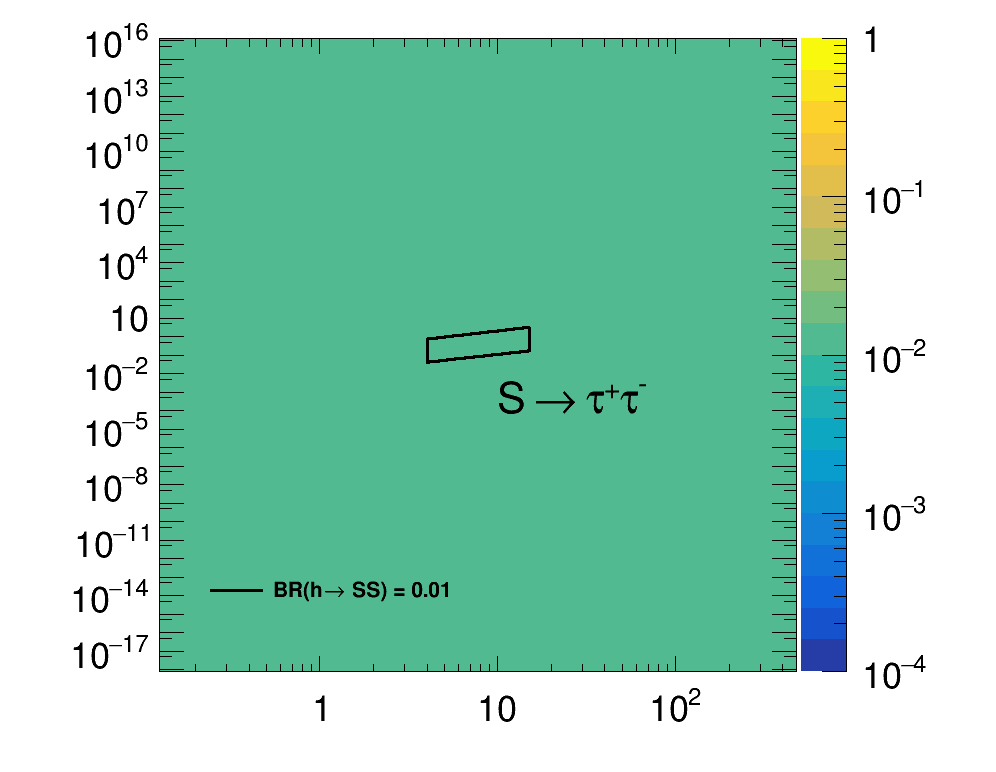

In [21]:
import os
import importlib
importlib.reload(sys.modules['CMS_lumi'])


decays =['EE', 'GammaGamma', 'KPlusKMinus', 'K0K0', 'Pi0Pi0', 'PiPlusPiMinus', 'dd', 'TauTau', 'BB']

opac_1sig = 0.25
opac_2sig = 0.1
for decay in decays:
    if not decay == 'TauTau':continue
#     print(decay)
#     leg = rt.TLegend(0.48,0.15,0.75,0.32)

    leg = rt.TLegend(0.2,0.15,0.5,0.32)

    leg.SetFillStyle(0)

    leg.SetTextSize(0.03)
    leg.SetBorderSize(0)
    rt.gStyle.SetLegendFillColor(1)
    leg.SetEntrySeparation(0.01)
#     leg2.SetTextSize(0.032)
#     leg2.SetBorderSize(0)
#     leg2.SetEntrySeparation(0.01)
    c = rt.TCanvas('c','c', 1000, 800)
    c.SetRightMargin(0.04)

    rt.gStyle.SetOptFit(1011)
    ctaus_m = ctaus/1000
#     print(ctaus_m)
#     h = create_TH2D(np.column_stack((np.array(0), np.array(0))), axis_title = ['LLP mass [GeV]','log10(c#tau)',''], binning = [300,0,30,100,-4,3])
    sample_temp = []
    m_sample = []
    x = array('d',[])
    y = array('d',[])
    z = array('d',[])
    for m in samples:
        if decay in m:
            m_sample.append(float(m[m.find('ms')+2:].replace('p','.')))
            sample_temp.append(m)
    ### set min and max mass range
#     if decay == 'dd' or decay == 'TauTau' or decay == 'BB': max_mass = 15
#     elif decay == 'EE' or decay == 'GammaGamma': max_mass = 1
#     elif 'K' in decay or 'Pi' in decay: max_mass = 4
    
#     else: max_mass = np.max(m_sample)
    max_mass = 15    
    if decay == 'dd': min_mass = 0.01 # mass is 0.0047 GeV
    elif decay == 'BB': min_mass = 9 # mass is 4.18 GeV
    elif decay == 'TauTau': min_mass = 4 # mass is 1.77 GeV
    elif decay == 'EE': min_mass = 0.01 # mass is 0.511 MeV
    elif decay == 'GammaGamma': min_mass = 0.01 
    elif decay == 'KPlusKMinus': min_mass = 1 # mass is 0.493 GeV
    elif decay == 'K0K0': min_mass = 1 # mass is 0.497 GeV
    elif decay == 'Pi0Pi0': min_mass = 0.3 # mass is 0.134 GeV
    elif decay == 'PiPlusPiMinus': min_mass = 0.31 # mass is 0.139 GeV

    print(decay, min_mass, max_mass)
    h = create_TH2D(np.column_stack((np.array(0), np.array(0))), axis_title = ['LLP mass [GeV]','c#tau [m]','95% CL upper limit on BR(h#rightarrow SS)'], \
                    binning = [50,math.log10(min_mass),math.log10(max_mass),80,-5,3])
#     h = create_TH2D(np.column_stack((np.array(0), np.array(0))), axis_title = ['LLP mass [GeV]','c#tau [m]','95% CL upper limit on BR(h#rightarrow SS)'], \
#                     binning = [50,math.log10(0.01),math.log10(max_mass),80,-5,3])
    for logm in np.arange(-3,2,0.1):
        m = 10.0**float(logm)
        if m >40 and m <55:continue
        if m == 0:continue
        use_m_s = 0.0
        if m>np.max(m_sample): 
            use_m_s = np.max(m_sample)
            index = np.argmax(m_sample)
        else:
            for i, m_s in enumerate(m_sample):
                if m <= m_s:
                    use_m_s = m_s
                    index = i
                    break
        cond = limits[sample_temp[index]][:,2] < 10000
        if decay == 'EE':cond = np.logical_and(cond, np.logical_not(ctaus_m==0.001))
        if decay == 'Pi0Pi0':cond = np.logical_and(cond, np.logical_not(ctaus_m==0.125))
        if decay == 'PiPlusPiMinus':
            cond = np.logical_and(cond, np.logical_not(ctaus_m==0.003))
            cond = np.logical_and(cond, np.logical_not(ctaus_m==0.002))
        for j in range(len(ctaus_m[cond])):
            if ctaus_m[cond][j]/1.0*use_m_s*m == 0.0:continue
#             print(m, float(m))
            x.append(math.log10(float(m)))
            y.append(math.log10(ctaus_m[cond][j]/use_m_s*m))
            z.append(math.log10(limits[sample_temp[index]][:,2][cond][j]))
#             print(x,y,z)
#             print(m, use_m_s, ctaus_m[cond][j], ctaus_m[cond][j]/1.0*use_m_s*m)
#             h.SetBinContent(h.GetXaxis().FindBin(float(m)), h.GetYaxis().FindBin(math.log10(ctaus_m[cond][j]/1.0*use_m_s*m)),limits[sample_temp[index]][:,2][cond][j])
            h.SetBinContent(h.GetXaxis().FindBin(math.log10(float(m))), h.GetYaxis().FindBin(math.log10(ctaus_m[cond][j]/1.0*use_m_s*m)),limits[sample_temp[index]][:,2][cond][j])
#     #     print(x,y,z)
    h = interpolate2D(x,y,z, h, 0.2,1)
    
    tdrstyle.setTDRStyle()
    
    
    
        
    #############
    # plot contour
    #############

    contours = array('d',[0.001, 0.01])
    hframed = frameTH2D(h)
#     hframed = h.Clone()

    hframed = log_scale_conversion(hframed)
    hframed.SetContour(len(contours),contours)
    hframed.SetMaximum(1)
    hframed.SetMinimum(0.0001)
    hframed.Draw("CONT Z LIST")

    rt.gPad.Update()

    h_blank = frameTH2D(h, 0.01, (math.log10(min_mass)+2)*50)
    h_blank = log_scale_conversion(h_blank)
    h_blank.SetMaximum(1)
    h_blank.SetMinimum(0.0001)
    h_blank.GetXaxis().SetLimits(0.001,15)
    h_blank.GetXaxis().SetRangeUser(0.001,15)
    h_blank.GetYaxis().SetRangeUser(1e-5,1e3)
    h_blank.GetYaxis().SetLimits(1e-5,1e3)
    h_blank.Draw('colz ')
    
    h = log_scale_conversion(h)
#     h.SetMinimum(1e-4)
#     h.SetMaximum(1) 
    

#     h.Draw('colz same')

    
    
    conts = rt.gROOT.GetListOfSpecials().FindObject("contours")
    cont_gr = []
    for i in range(conts.GetSize()):
        contour0 = conts.At(i)
        curv = contour0.First()
        finalcurv = rt.TGraph(1)
#         print(contours_plotted)

        try:
            curv.SetLineWidth(3)
            curv.SetLineColor(std_color_list[0])
            curv.SetLineStyle(std_color_list[i])

            curv.Draw("lsame")
            finalcurv = curv.Clone()
            maxN = curv.GetN()
            for i in range(1, contour0.GetSize()):
                curv = contour0.After(curv)
                curv.SetLineWidth(3)
                curv.SetLineColor(rt.kBlack)
                curv.Draw("lsame")
                if curv.GetN()>maxN:
                    maxN = curv.GetN()
                    finalcurv = curv.Clone()
            cont_gr.append(finalcurv)
        except AttributeError:
            print ("ERROR: no curve drawn for contour %s "%(i))
    for idex in range(len(cont_gr)):
        i = len(cont_gr)-idex-1
        leg.AddEntry(cont_gr[i],'BR(h#rightarrow SS) = '+str(contours[len(contours)-idex-1]), 'L')
        finalcurv.Draw('lsame')



    latex = rt.TLatex()
    latex.SetTextSize(0.06)
    latex.SetTextFont(42)

    if decay == 'dd': latex.DrawLatex(max_mass/10,0.00007,  "S #rightarrow d#bar{d}")
    elif decay == 'BB': latex.DrawLatex(max_mass/1.2,0.00007, "S #rightarrow b#bar{b}")
    elif decay == 'TauTau': latex.DrawLatex(max_mass/1.5,0.00007, "S #rightarrow #tau^{+}#tau^{-}")
    elif decay == 'EE': latex.DrawLatex(max_mass/10,0.00007, "S #rightarrow e^{+}e^{-}")
    elif decay == 'GammaGamma': latex.DrawLatex(max_mass/10,0.00007, "S #rightarrow #gamma^{+}#gamma^{-}")
    elif decay == 'KPlusKMinus': latex.DrawLatex(max_mass/3,0.00007, "S #rightarrow K^{+}K^{-}")
    elif decay == 'K0K0': latex.DrawLatex(max_mass/3,0.00007, "S #rightarrow K^{0}K^{0}")
    elif decay == 'Pi0Pi0': latex.DrawLatex(max_mass/3,0.00007, "S #rightarrow #pi^{0}#pi^{0}")
    elif decay == 'PiPlusPiMinus': latex.DrawLatex(max_mass/3,0.00007, "S #rightarrow #pi^{+}#pi^{-}")

    leg.Draw()
    
    c.SetRightMargin(0.2)
    c.SetLogz()
    c.SetLogx()
    c.SetLogy()
    


    c.Draw()
    

    output_dir = '/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/double_tag/limits/'+version+'/'+dc_version+'/'+unblind+'/'
    if not os.path.isdir(output_dir):os.makedirs(output_dir)
    name = output_dir+mode+'_HToSSTo'+decay


#     print(name)
    c.SaveAs(name+'_2d_expected_samexaxis.png')
    c.SaveAs(name+'_2d_expected_samexaxis.C')
    c.SaveAs(name+'_2d_expected_samexaxis.pdf')

#     tdrstyle.setTDRStyle()
#     c.Draw()


In [315]:
from scipy.interpolate import NearestNDInterpolator
from scipy.interpolate import LinearNDInterpolator


In [405]:
def interpolate2D(x,y,z,hist,epsilon=0.2,smooth=0,norm = 'euclidean', inter = 'linear'):


    binWidthX = float(hist.GetXaxis().GetBinWidth(1))
    binWidthY = float(hist.GetYaxis().GetBinWidth(1))

    mgMin = hist.GetXaxis().GetBinCenter(1)
    mgMax = hist.GetXaxis().GetBinCenter(hist.GetNbinsX())#+hist.GetXaxis().GetBinWidth(hist.GetNbinsX())
    mchiMin = hist.GetYaxis().GetBinCenter(1)
    mchiMax = hist.GetYaxis().GetBinCenter(hist.GetNbinsY())#+hist.GetYaxis().GetBinWidth(hist.GetNbinsY())

    myX = np.linspace(mgMin, mgMax, hist.GetNbinsX())
    myY = np.linspace(mchiMin, mchiMax, hist.GetNbinsY())
    myXI, myYI = np.meshgrid(myX,myY)

    
#         
#         rbf = NearestNDInterpolator(list(zip(x, y)), z)
    if inter == 'linear':rbf = LinearNDInterpolator(list(zip(x, y)), z)
    else: rbf = Rbf(x, y, z, function='multiquadric', epsilon=epsilon,smooth=smooth, norm = norm)



    myZI = rbf(myXI, myYI)
    print(len(myX), len(myY))
    print(len(x))
    for i in range(1, hist.GetNbinsX()+1):
        
        for j in range(1, hist.GetNbinsY()+1):
            
    #                 if not hist.GetBinContent(i,j) == 0:
    #                     print(hist.GetBinContent(i,j),10**(myZI[j-1][i-1]))
            hist.SetBinContent(i,j,10**(myZI[j-1][i-1]))
    #                 hist.SetBinContent(i,j,myZI[j-1][i-1])
            
    return hist


# scale limit by BR

{'EE': [0.4], 'GammaGamma': [0.4], 'KPlusKMinus': [1.5], 'K0K0': [1.5], 'Pi0Pi0': [0.4, 1.0], 'PiPlusPiMinus': [0.4, 1.0], 'dd': [3.0, 7.0, 15.0, 40.0, 55.0], 'TauTau': [7.0, 15.0, 40.0, 55.0], 'BB': [15.0, 40.0, 55.0]}
{'EE': ['0p4'], 'GammaGamma': ['0p4'], 'KPlusKMinus': ['1p5'], 'K0K0': ['1p5'], 'Pi0Pi0': ['0p4', '1p0'], 'PiPlusPiMinus': ['0p4', '1p0'], 'dd': ['3p0', '7', '15', '40', '55'], 'TauTau': ['7', '15', '40', '55'], 'BB': ['15', '40', '55']}
[1.91714487e-01 1.67275426e-01 1.37509974e-01 1.07863528e-01
 8.27267521e-02 6.44508106e-02 5.13567375e-02 4.19077942e-02
 2.23762222e-02 1.46395212e-02 1.09398870e-02 8.86839786e-03
 7.65505858e-03 6.86318168e-03 6.33168295e-03 5.97847506e-03
 5.76228433e-03 5.61231456e-03 5.50811970e-03 5.46895561e-03
 5.45066306e-03 5.47925045e-03 5.51608877e-03 5.57372226e-03
 6.08754334e-03 6.82037642e-03 7.73017100e-03 8.73544592e-03
 9.88887105e-03 1.26032549e-02 1.40917237e-02 1.57494215e-02
 1.74128680e-02 1.92430354e-02 2.11856775e-02 2.316205

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


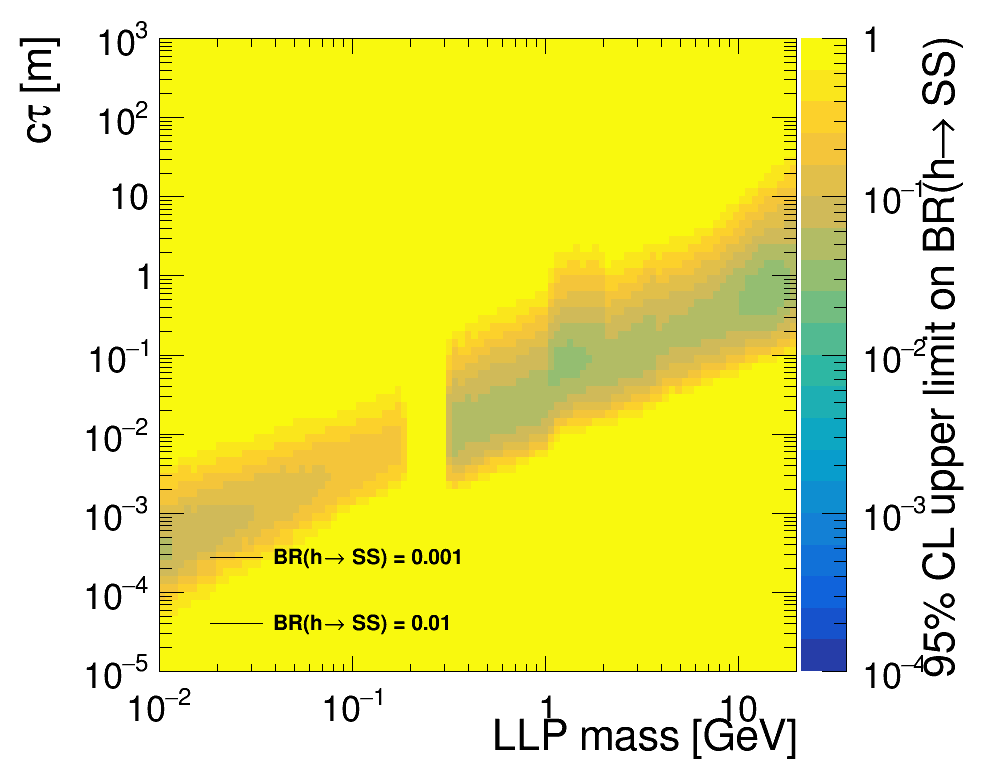

In [502]:
import os
import importlib
importlib.reload(sys.modules['CMS_lumi'])


decays =['EE', 'GammaGamma', 'KPlusKMinus', 'K0K0', 'Pi0Pi0', 'PiPlusPiMinus', 'dd', 'TauTau', 'BB']
pid = [11, 22,321,311,111,211,1,15,5]
mass = {}
mass_string = {}
for d in decays:
    mass[d] = []
    mass_string[d] = []
    for s in samples:
        if d in s:
            mass[d].append(float(s[s.find('ms')+2:].replace('p','.')))
            mass_string[d].append(s[s.find('ms')+2:])
print(mass)
print(mass_string)
opac_1sig = 0.25
opac_2sig = 0.1

leg = rt.TLegend(0.2,0.15,0.5,0.32)

leg.SetFillStyle(0)

leg.SetTextSize(0.03)
leg.SetBorderSize(0)
rt.gStyle.SetLegendFillColor(1)
leg.SetEntrySeparation(0.01)
c = rt.TCanvas('c','c', 1000, 800)
c.SetRightMargin(0.04)

rt.gStyle.SetOptFit(1011)
ctaus_m = ctaus/1000

sample_temp = []
m_sample = []
x = array('d',[])
y = array('d',[])
z = array('d',[])
x_low = array('d',[])
y_low = array('d',[])
z_low = array('d',[])
max_mass = 20    
min_mass = 0.01

h = create_TH2D(np.column_stack((np.array(0), np.array(0))), axis_title = ['LLP mass [GeV]','c#tau [m]','95% CL upper limit on BR(h#rightarrow SS)'], \
                binning = [100,math.log10(min_mass),math.log10(max_mass),80,-5,3])

br_path = '/storage/af/user/christiw/login-1/christiw/LLP/CMSSW_9_4_4/src/llp_analyzer/data/branchingRatio_phi/'
# import required module
h_mass = {}
for filename in os.listdir(br_path): # loop over mass points from 0.1 to 40 GeV
    f = os.path.join(br_path, filename)
    if os.path.isfile(f) and '.txt' in filename and filename[:3] == 'phi':
        m = float(filename[4:-4].replace('dot', '.'))
#         if not round(m,1) == m and m > 1.0:
#             print(m)
#             continue
#         if m >40 and m <55:continue
        if m == 0:continue
        if m <= 0.2:continue # use just EE for below 0.2
            
        
        br = []
        decay = []
        total_limits = np.array([])
        with open(f) as fi:
            lines = fi.readlines()
            for i_line,line in enumerate(lines): #loop over all decays
                if not '9000006:addChannel' in line:continue
                br_line = line[line.find('=')+2:].split(" ")
#                 print(i_line,line)
                assert(abs(float(br_line[3])) == abs(float(br_line[4])))
                if abs(float(br_line[3])) == 13:continue
                if abs(float(br_line[3])) == 3 or abs(float(br_line[3])) == 4 or abs(float(br_line[3])) == 21:
                    decay.append(1)
                else:decay.append(abs(float(br_line[3])))
                br.append(float(br_line[1]))
                if decay[-1] not in pid:print('PARTICLE NOT FOUND', br_line[3])
        
                # find which mass to use
                use_m_s = 0.0
                list_of_m = mass[decays[pid.index(decay[-1])]]
                if m>np.max(list_of_m): 
                    use_m_s = np.max(list_of_m)
                    index = np.argmax(list_of_m)
                else:
                    for i, m_s in enumerate(list_of_m):
                        if m <= m_s:
                            use_m_s = m_s
                            index = i
                            break
                # find sample corresponding to the mass and decay mode
                sample_name = 'allProd_withggZH_HToSS_STo'+decays[pid.index(decay[-1])]+'_ms'+mass_string[decays[pid.index(decay[-1])]][index]
                assert(sample_name in samples)
            
#                 if 'Pi0' in sample_name and '0p4' in sample_name:print(m)
                if len(total_limits) == 0:
                    x += array('d', [math.log10(float(m))]*len(ctaus_m))
                    y += array('d', np.log10(ctaus_m/use_m_s*m))
                    total_limits = 1./limits[sample_name][:,2]*br[-1]
                else:
                    total_limits += 1./limits[sample_name][:,2]*br[-1]
                
#             if np.min(1./total_limits)<0.001: print(m,np.min(1./total_limits))
            total_limits = np.log10(1./total_limits)
#             total_limits = 1./total_limits

            for j in range(len(ctaus_m)):
#                     if 'Pi0' in sample_name and '0p4' in sample_name:print(ctaus_m[j], ctaus_m[j]/use_m_s*m, h.GetYaxis().FindBin(math.log10(ctaus_m[j]/use_m_s*m)))
                    h.SetBinContent(h.GetXaxis().FindBin(math.log10(float(m))), h.GetYaxis().FindBin(math.log10(ctaus_m[j]/use_m_s*m)),\
                                    10**(total_limits[j]))
#                     print(10**(total_limits[j]))
            z += array('d', list(total_limits))
        
        
        
for logm in np.arange(-2,math.log10(0.2),0.01):
    m = 10.0**float(logm)
    
    sample_name = 'allProd_withggZH_HToSS_SToEE_ms0p4' #always decay to EE
    cond = np.logical_and(limits[sample_name][:,2] < 20, np.logical_not(ctaus_m==0.001))            
    cond = np.logical_and(cond, ctaus_m > 0.002)

    
    x += array('d', [math.log10(float(m))]*len(ctaus_m[cond]))
    y += array('d', np.log10(ctaus_m[cond]/0.4*m))
    z += array('d', np.log10(limits[sample_name][:,2][cond]))
#     z += array('d', limits[sample_name][:,2][cond])
    for j in range(len(ctaus_m[cond])):
        h.SetBinContent(h.GetXaxis().FindBin(math.log10(float(m))), h.GetYaxis().FindBin(math.log10(ctaus_m[cond][j]/0.4*m)),limits[sample_name][:,2][cond][j])

for logm in np.arange(math.log10(0.2),math.log10(0.3),0.01):
    m = 10.0**float(logm)
    
    sample_name = 'allProd_withggZH_HToSS_SToEE_ms0p4' #always decay to EE
#     2--> 0.4
    cond = np.logical_and(limits[sample_name][:,2] < 20, np.logical_not(ctaus_m==0.001))       
    cond = np.logical_and(cond, ctaus_m > 0.002)
#     print(ctaus_m[cond])
#     print(limits[sample_name][:,2][cond])
    x += array('d', [math.log10(float(m))]*len(ctaus_m[cond]))
    y += array('d', np.log10(ctaus_m[cond]/0.4*m))
    z += array('d', np.log10(limits[sample_name][:,2][cond]/0.001))
#     z += array('d', limits[sample_name][:,2][cond])
    for j in range(len(ctaus_m[cond])):
        h.SetBinContent(h.GetXaxis().FindBin(math.log10(float(m))), h.GetYaxis().FindBin(math.log10(ctaus_m[cond][j]/0.4*m)),1000*limits[sample_name][:,2][cond][j])

        
print(limits[sample_name][:,2][cond])

print(len(x), len(y), len(z))

# h = interpolate2D(x,y,z, h, 0.02,0, inter = 'linear', norm = 'seuclidean')
x = array('d', [])
y = array('d', [])
z = array('d', [])
for i in range(1, h.GetNbinsX()+1):
    for j in range(1, h.GetNbinsY()+1):
        if not math.isnan(h.GetBinContent(i,j)) and not h.GetBinContent(i,j) == 0:
            x.append(h.GetXaxis().GetBinCenter(i))
            y.append(h.GetYaxis().GetBinCenter(j))
            z.append(math.log10(h.GetBinContent(i,j)))


# # h = interpolate2D(x,y,z, h, 0.02,0.5, inter = 'rbf', norm = 'seuclidean')
# h = interpolate2D(x,y,z, h, 0.02,0, inter = 'rbf', norm = 'seuclidean')

# 
h = interpolate2D(x,y,z, h, 0.02,0, inter = 'rbf', norm = 'euclidean')

tdrstyle.setTDRStyle()




# #############
# # plot contour
# #############

contours = array('d',[ 0.001, 0.01])
hframed = frameTH2D(h)
hframed = log_scale_conversion(hframed)
hframed.SetContour(len(contours),contours)
hframed.SetMaximum(1)
hframed.SetMinimum(0.0005)
hframed.Draw("CONT Z LIST")

rt.gPad.Update()

h = log_scale_conversion(h)
h.SetMinimum(1e-4)
h.SetMaximum(1) 
h.Draw('colz')

conts = rt.gROOT.GetListOfSpecials().FindObject("contours")
cont_gr = []
print(conts.GetSize())
for i in range(conts.GetSize()):
#     cont_gr[i] = []
    contour0 = conts.At(i)
    curv = contour0.First()
    finalcurv = rt.TGraph(1)
    print(contour0.GetSize())
    try:
        curv.SetLineWidth(3)
        curv.SetLineColor(std_color_list[0])
        if i == 0:curv.SetLineStyle(1)
        else: curv.SetLineStyle(2)
        curv.Draw("lsame")
        finalcurv = curv.Clone()
        maxN = curv.GetN()
    except AttributeError:
        print ("ERROR: no curve drawn for contour %s "%(i))
    for j in range(1, contour0.GetSize()):
        curv = contour0.After(curv)
        curv.SetLineWidth(3)
        curv.SetLineColor(std_color_list[0])
        if i == 0:curv.SetLineStyle(1)
        else: curv.SetLineStyle(2)
        curv.Draw("lsame")
        if curv.GetN()>maxN:
            maxN = curv.GetN()
            finalcurv = curv.Clone()
    cont_gr.append(finalcurv)
print(len(cont_gr))
for i in range(len(cont_gr)):
    leg.AddEntry(cont_gr[i],'BR(h#rightarrow SS) = '+str(contours[i]), 'L')


leg.Draw()

c.SetRightMargin(0.2)

c.SetLogz()
c.SetLogx()
c.SetLogy()



c.Draw()


# output_dir = '/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/double_tag/limits/'+version+'/'+dc_version+'/'+unblind+'/'
# if not os.path.isdir(output_dir):os.makedirs(output_dir)
# name = output_dir+mode+'_HToSSTo'+decay


# #     print(name)
# c.SaveAs(name+'_2d_expected.png')
# c.SaveAs(name+'_2d_expected.C')
# c.SaveAs(name+'_2d_expected.pdf')

#     tdrstyle.setTDRStyle()
#     c.Draw()


# Observed Limit

In [ ]:
import os
import importlib
importlib.reload(sys.modules['CMS_lumi'])





opac_1sig = 0.25
opac_2sig = 0.15
for band in [0,1,2]:# 0 is no band, 1 is with 1sig only, 2 is with both 1sig and 2sig band
    if not band == 1:continue

    if band ==2: 
        leg = rt.TLegend(0.3,0.75,0.9,0.92)
        leg2 = rt.TLegend(0.1,0.75,0.3,0.90)
    elif band ==1: 
#         leg = rt.TLegend(0.48,0.75,0.95,0.92)
#         leg2 = rt.TLegend(0.18,0.77,0.40,0.90)
        
        leg = rt.TLegend(0.48,0.15,0.95,0.32)
        leg2 = rt.TLegend(0.18,0.17,0.40,0.30)
    else:
        leg = rt.TLegend(0.6,0.7,0.9,0.92)
        leg2 = rt.TLegend(0.2,0.7,0.45,0.92)
    
    
    leg.SetTextSize(0.03)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    
    leg2.SetTextSize(0.032)
    leg2.SetBorderSize(0)
    leg2.SetEntrySeparation(0.01)
    c = rt.TCanvas('c','c', 800, 800)
    c.SetRightMargin(0.04)


    rt.gStyle.SetOptFit(1011)
    ctaus_m = ctaus/1000
    print(ctaus_m)
    h = {}
    h_exp1sig = {}
    h_exp2sig = {}
    h_obs = {}
    h_others = {}
   
    for i, m in enumerate(mass):
        cond = limits[m][:,2] < 50
        cond = np.logical_and(cond, limits[m][:,0] < 50)
        cond = np.logical_and(cond, limits[m][:,1] < 50)
        cond = np.logical_and(cond, limits[m][:,3] < 50)




#         if not m == 7:continue
        if decay == 'dddd':
            if m == 7:
                cond = np.logical_and(cond, np.logical_not(ctaus_m==5))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==3))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==4))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==6))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==0.1))


                cond = np.logical_and(cond, np.logical_not(ctaus_m==30))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==20))



            if m == 15:
                cond = np.logical_and(cond, np.logical_not(ctaus_m==0.7))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==7))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==6))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==4))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==0.3))
            if m == 40:
                cond = np.logical_and(cond, np.logical_not(ctaus_m==0.6))


            if m == 55:
                cond = np.logical_and(cond, np.logical_not(ctaus_m==8))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==6))


        if decay == '4Tau':
            if m == 7:
#                 cond = np.logical_and(cond, np.logical_not(ctaus_m==0.1))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==0.06))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==0.2))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==0.125))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==0.8))







                cond = np.logical_and(cond, np.logical_not(ctaus_m==2))
#                 cond = np.logical_and(cond, np.logical_not(ctaus_m==4))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==7))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==10))
            if m == 15:
                cond = np.logical_and(cond, np.logical_not(ctaus_m==0.8))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==0.6))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==6))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==5))

#                 cond = np.logical_and(cond, np.logical_not(ctaus_m==8))

                cond = np.logical_and(cond, np.logical_not(ctaus_m==4))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==10))




            if m == 40:
                cond = np.logical_and(cond, np.logical_not(ctaus_m==7))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==6))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==4))



            if m == 55:
                cond = np.logical_and(cond, np.logical_not(ctaus_m==5))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==8))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==4))




                
        if decay == 'bbbb':
            if m == 15:
                cond = np.logical_and(cond, np.logical_not(ctaus_m==0.5))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==8))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==0.8))



            if m == 40:
                cond = np.logical_and(cond, np.logical_not(ctaus_m==0.5))

                cond = np.logical_and(cond, np.logical_not(ctaus_m==5))

                cond = np.logical_and(cond, np.logical_not(ctaus_m==10))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==7))
                
            if m == 55:
                cond = np.logical_and(cond, np.logical_not(ctaus_m==5))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==4))
#                 cond = np.logical_and(cond, np.logical_not(ctaus_m==2))





#         h[m] = create_TGraph(ctaus_m[cond], limits[m][:,2][cond],  axis_title=['c#tau [m]', '95% CL upper limit on B(H  #rightarrow SS)'])
#         h_obs[m] = create_TGraph(ctaus_m[cond], limits[m][:,5][cond],  axis_title=['c#tau [m]', '95% CL upper limit on B(H #rightarrow SS)'])
    
        h[m] = create_TGraph(ctaus_m[cond], limits[m][:,2][cond],  axis_title=['c#tau [m]', '95% CL upper limit on  #bf{#it{#Beta}}(H #rightarrow SS)'])
        h_obs[m] = create_TGraph(ctaus_m[cond], limits[m][:,5][cond],  axis_title=['c#tau [m]', '95% CL upper limit on #bf{#it{#Beta}}(H #rightarrow SS)'])
    
    
    

        h_exp1sig[m] = create_TGraph(np.hstack((ctaus_m[cond], np.flip(ctaus_m[cond]))), np.hstack((limits[m][:,1][cond], np.flip(limits[m][:,3][cond]))))
        h_exp2sig[m] = create_TGraph(np.hstack((ctaus_m[cond], np.flip(ctaus_m[cond]))), np.hstack((limits[m][:,0][cond], np.flip(limits[m][:,4][cond]))))
        
        leg.AddEntry(h_obs[m], "m_{S} = "+str(m)+" GeV", "L")
        if m == 15:
            leg2.AddEntry(h_obs[m], "Observed", "LP")
            leg2.AddEntry(h[m], "Median expected", "L")
            



        if band>0: leg.AddEntry(h_exp1sig[m], "#pm 1 #sigma expected", 'F')
        if band==2: leg.AddEntry(h_exp2sig[m], "#pm 2 #sigma expected", 'F')
        
        if len(mass) == 3: 
            h_exp1sig[m].SetFillColorAlpha(std_color_list[i],opac_1sig)
            h_exp2sig[m].SetFillColorAlpha(std_color_list[i], opac_2sig)
            h[m].SetLineColor(std_color_list[i])
            h_obs[m].SetLineColor(std_color_list[i])
            h_obs[m].SetMarkerColor(std_color_list[i])


        else: 
            if i == 0:
                h_exp1sig[m].SetFillColorAlpha(std_color_list[3], opac_1sig)
                h_exp2sig[m].SetFillColorAlpha(std_color_list[3], opac_2sig)
                h[m].SetLineColor(std_color_list[3])
                h_obs[m].SetLineColor(std_color_list[3])
                h_obs[m].SetMarkerColor(std_color_list[3])
            else: 
                h_exp1sig[m].SetFillColorAlpha(std_color_list[i-1],opac_1sig)
                h_exp2sig[m].SetFillColorAlpha(std_color_list[i-1], opac_2sig)
                h[m].SetLineColor(std_color_list[i-1])
                h_obs[m].SetLineColor(std_color_list[i-1])
                h_obs[m].SetMarkerColor(std_color_list[i-1])
        h_obs[m].SetLineWidth(3)
#         h_obs[m].SetMarkerStyle(20)
#         h_obs[m].SetMarkerSize(1)

        h[m].SetLineStyle(2)
        h[m].SetLineWidth(3)
        h[m].GetXaxis().SetLimits(0.01,10000.0)
        h[m].GetYaxis().SetRangeUser(5e-4,50)
        h[m].GetYaxis().SetRangeUser(1e-4,1)

        h[m].GetXaxis().SetTitleOffset(1)
        h[m].GetYaxis().SetTitleSize(0.05)
        h[m].GetYaxis().SetTitleOffset(1.5)
#         h[m].SetTitle('95% CL upper limit on B(H #rightarrow SS)')
#         graph->SetTitle("global title;X axis title;Y axis title;Z axis title");




        ###### save to text file for hepdata ######
        outputDir = '/storage/af/user/christiw/login-1/christiw/LLP/CMSSW_9_4_4/src/llp_analyzer/data/SupplementaryMaterials/'+dc_version+'/'
#         if not os.path.isdir(outputDir):os.makedirs(outputDir)
#         outputFileName = outputDir + 'limits'+decay+'_m'+str(m)
#         if hybridNew: outputFileName += '_hybridNew'
#         outputFileName += '.txt'
#         np.savetxt(outputFileName, np.column_stack((ctaus_m[cond], limits[m][cond])), delimiter="\t")

        ###### save to ROOT file ######
#         outFile = rt.TFile(outputDir+'limits.root', 'UPDATE')
#         name = ['n2sig', 'n1sig', 'exp', 'p1sig', 'p2sig','obs']
#         outFile.WriteTObject(h[m], 'h_'+decay+'_m'+str(m)+'_exp', "WriteDelete");
#         outFile.WriteTObject(h_obs[m], 'h_'+decay+'_m'+str(m)+'_obs', "WriteDelete");


    
#         outFile.Close();
        

    for i,m in enumerate(h.keys()):
        h[m].Draw('LA' if i == 0 else 'Lsame')
        h_obs[m].Draw('LPsame')
        if band>0: h_exp1sig[m].Draw('Fsame')
        if band==2: h_exp2sig[m].Draw('Fsame')

    leg.Draw()
    leg2.Draw()

    tdrstyle.setTDRStyle()
    CMS_lumi.cmsText     = "CMS"
    
    CMS_lumi.writeExtraText = 0
    CMS_lumi.extraText   = "Supplementary"
    CMS_lumi.extraText   = "Preliminary"
    CMS_lumi.cmsTextSize      = 1.2
    
    
    
    if (CMS_lumi.writeExtraText == 0): 
        iPos = 11
        CMS_lumi.relPosX = 0.15
        CMS_lumi.relPosY = 0.73
    else:
        iPos = 0
        CMS_lumi.relPosX = 0.12
    CMS_lumi.CMS_lumi(c, 4, iPos)


    if band>0:leg.SetNColumns(2)
    if band == 2:leg.SetNColumns(3)

    
    c.SetLogy()
    c.SetLogx()
    c.SetTicky(1)
    c.SetTickx(1)
    
    
    latex = rt.TLatex()
    latex.SetTextSize(0.06)
    latex.SetTextFont(42)
        
    if decay == 'dddd': latex.DrawLatex(200,0.002,  "S #rightarrow d#bar{d}")
    elif decay == 'bbbb': latex.DrawLatex(200,0.002, "S #rightarrow b#bar{b}")
    elif decay == '4Tau': latex.DrawLatex(200,0.002, "S #rightarrow #tau^{+}#tau^{-}")





    ###### save plot #####

    output_dir = '/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/limits/'+version+bdt_name+'/'+dc_version+'/'+unblind+'/'
    if not os.path.isdir(output_dir):os.makedirs(output_dir)
    name = output_dir+mode+'_HToSSTo'+decay+'_'+dphi+'_nRechit'+str(nrechit)
    if hybridNew:name += '_hybridNew'
    if band==2: name += '_with2sig'
    elif band>0: name += '_with1sig'
    if CMS_lumi.writeExtraText and CMS_lumi.extraText == 'Preliminary': name += "_pas"
    if CMS_lumi.writeExtraText and CMS_lumi.extraText == 'Supplementary': name += "_supplementary"


    c.SaveAs(name+'.png')
    c.SaveAs(name+'.C')
    c.SaveAs(name+'.pdf')


    c.Draw()
    
    


    # print(time.time()-start_t)

# limit for different mass points

In [ ]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot



# Plotting ncsc
start_t = time.time()

rt.gStyle.SetOptFit(1011)
# for i,k in enumerate(tree_bkg.keys()):
br = 1
ctaus_m = ctaus/1000
print(ctaus_m)
# print(limits[:,2])
h_others = {}
h = {}
h_exp1sig = {}
h_exp2sig = {}
h_obs = {}
for m in mass:
#     if not m == 15:continue
    print(m)
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.5,0.73,0.80,0.92)
    leg.SetTextSize(0.03)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    cond = limits[m][:,2] < 1
    h[m] = create_TGraph(ctaus_m[cond], limits[m][:,2][cond],  axis_title=['c#tau [m]', '95% CL Limit on BR'])
    if drawObs: h_obs[m] = create_TGraph(ctaus_m[cond], limits_obs[m][:,5][cond])


    h_exp1sig[m] = create_TGraph(np.hstack((ctaus_m[cond], np.flip(ctaus_m[cond]))), np.hstack((limits[m][:,1][cond], np.flip(limits[m][:,3][cond]))))
    h_exp2sig[m] = create_TGraph(np.hstack((ctaus_m[cond], np.flip(ctaus_m[cond]))), np.hstack((limits[m][:,0][cond], np.flip(limits[m][:,4][cond]))))
#
    leg.AddEntry(h[m], "Expected  95% CL upper limit", "L")
    leg.AddEntry(h_obs[m], "Observed", "PL")
    leg.AddEntry(h_exp1sig[m], "#pm 1 #sigma Expected", 'F')
    leg.AddEntry(h_exp2sig[m], "#pm 2 #sigma Expected", 'F')
    h[m].SetLineColor(std_color_list[2])
    h[m].SetLineWidth(2)
    h[m].SetLineStyle(4)


    
    h_obs[m].SetMarkerStyle(8)
    h_obs[m].SetMarkerSize(1)
    h_obs[m].SetLineColor(1)
    h_obs[m].SetLineWidth(2)
    h_exp1sig[m].SetFillColor(417)
    h_exp2sig[m].SetFillColor(800)
    h[m].GetXaxis().SetLimits(0.01,1000.0)
    h[m].GetYaxis().SetRangeUser(1e-5,100)
    h[m].GetXaxis().SetTitleOffset(1)

    h[m].Draw('LA')
    h_exp2sig[m].Draw( 'Fsame')
    h_exp1sig[m].Draw('Fsame')
    h[m].Draw('Lsame')
    h_obs[m].Draw('PLsame')

    tdrstyle.setTDRStyle()
    CMS_lumi.cmsText     = "CMS"
    iPos = 0
    CMS_lumi.writeExtraText = True
    CMS_lumi.extraText   = "Preliminary"
    iPos = 0
    if( iPos==0 ): CMS_lumi.relPosX = 0.12
    CMS_lumi.CMS_lumi(c, 4, 0)
    leg.Draw()
    c.SetRightMargin(0.03)
    c.SetLogy()
    c.SetLogx()
    c.SetTicky(1)
    c.SetTickx(1)
    c.Draw()
    output_dir = '/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/limits/'+version+bdt_name+'/'+dc_version+'/unblind/'
    if not os.path.isdir(output_dir):os.makedirs(output_dir)
    if VBFH:
        c.SaveAs(output_dir+'/vbfh_'+decay+'_mx'+str(m)+dphi+'_nRechit'+str(nrechit)+'.png')
        c.SaveAs(output_dir+'/vbfh_'+decay+'_mx'+str(m)+dphi+'_nRechit'+str(nrechit)+'.C')
    else:
        c.SaveAs(output_dir+'/ggh_'+decay+'_mx'+str(m)+dphi+'_nRechit'+str(nrechit)+'.png')
        c.SaveAs(output_dir+'/ggh_'+decay+'_mx'+str(m)+dphi+'_nRechit'+str(nrechit)+'.C')

# limit for different nrechits

##### load ntuples

In [ ]:
limitTrees =OrderedDict()
dataCards = OrderedDict()
version = '/V1p17/v1/v66/'
bdt_name = 'cut_based_v4'
dc_version = 'v7'
methodA = True
dphi = 'dPhiCluster0p75'
# dphi = 'dPhiJet0p6'
nRechit = 'nRechit130'
# NEW_CTAU = 60 #cm
limitDir0 = '/storage/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/limitTrees/'+version+'/'+bdt_name+'/'+dc_version+'/'
dataCardDir0 = '/storage/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/datacards/'+version+'/'+bdt_name+'/'+dc_version+'/'
method = 1
fit_function = 'methodB/blind/'
nRechits = np.arange(60,220,10)
nRechits = np.arange(60,180,10)
nRechits = [60,70,80,90,100,120,130,135,140,145,150,155,160,170]

# dphis = np.arange(55,100,5)/100
# ctaus = np.array([5, 10, 30, 40, 50, 100, 200, 300, 500, 1000, 5000, 10000, 20000, 50000, 100000])
ctaus = np.array([1000])
masses = np.array([15, 40, 55])
ct = 1000
var = nRechits


limits = np.ones((len(masses),len(nRechits), 6))



limitDir = limitDir0 +fit_function+'/'
dataCardDir = dataCardDir0 + fit_function+'/'
for i, m in enumerate(masses):
    for j,nRechit in enumerate(var):
        limitTrees[str(nRechit)] = limitDir + 'higgsCombine.ggh_HToSSTobbbb_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nRechit'+ str(nRechit)+ dphi+'.AsymptoticLimits.mH120.root'
        dataCards[str(nRechit)] = dataCardDir + 'ggh_HToSSTobbbb_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nRechit'+ str(nRechit)+ dphi+'.txt'

    for j,k in enumerate(limitTrees.keys()):
        root_dir = uproot.open(limitTrees[k]) 
        T = root_dir['limit']
        text_file = open(dataCards[k], "r")
        line = text_file.readline()
        signal_norm = float(line.split(" ")[3])
        limits[i,j] = np.array(T.array('limit'))/signal_norm
  
    print(nRechits)


#### plot limit vs. nrechit

In [ ]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot
leg = rt.TLegend(0.25,0.75,0.55,0.90)
leg.SetTextSize(0.03)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)



c = rt.TCanvas('c','c', 900, 800)
# Plotting ncsc
start_t = time.time()

rt.gStyle.SetOptFit(1011)
h = {}
h_exp2sig = {}
h_exp1sig = {}

# for i, m in enumerate(masses):
legend = {}
legend[0] = 'scaled from intime low BDT, ABCD method'
legend[1] = 'scaled from OOT high BDT, ABCD method'
legend[2] = 'scaled from OOT high BDT, single expo'
legend[3] = 'scaled from OOT high BDT, modified expo'
legend[4] = 'scaled from OOT high BDT, single power law'





for i, m in enumerate(masses):
    
   
    h[m] = create_TGraph(var, limits[i,:,2],  axis_title=['N_{rechits} cut', '95% CL Limit on BR'])
    h_exp1sig[m] = create_TGraph(np.hstack((var, np.flip(var))), np.hstack((limits[i,:,1], np.flip(limits[i,:,3]))))
    h_exp2sig[m] = create_TGraph(np.hstack((var, np.flip(var))), np.hstack((limits[i,:,0], np.flip(limits[i,:,4]))))

    leg.AddEntry(h[m], "m_{x} = "+str(m)+" GeV, c#tau = "+str(int(ct/1000))+" m", "L")


#     leg.AddEntry(h_exp1sig, "#pm 1 #sigma Expected", 'F')
#     leg.AddEntry(h_exp2sig, "#pm 2 #sigma Expected", 'F')

#     h_exp1sig.SetFillColor(std_color_list[3])
#     h_exp2sig.SetFillColor(5)
    h[m].SetLineColor(std_color_list[i])
    h[m].SetLineWidth(2)
    h_exp1sig[m].SetFillColor(417)
    h_exp2sig[m].SetFillColor(800)
  
    
    h[m].Draw('ac' if i == 0 else 'c')
#     if m == 55:
#         h_exp2sig[m].Draw( 'Fsame')
#         h_exp1sig[m].Draw('Fsame')
    h[m].Draw('LSame')


# #     h[m].GetXaxis().SetLimits(0.5,1)
    h[m].GetXaxis().SetLimits(50,200)
    h[m].GetYaxis().SetRangeUser(1e-4,1)
#     h[m].GetXaxis().SetTitleOffset(1)

#     h_exp2sig.Draw('Fsame')
#     h_exp1sig.Draw('Fsame')
#     h.Draw('Lsame')

#     result = nRechits[np.where(limits[i,:,2] == np.amin(limits[i,:,2]))]
#     print("nRechits cut with minimum limit: ", result)




leg.Draw()
c.SetRightMargin(0.1)
c.SetLogy()
# c.SetLogx()

c.Draw()
output_dir = '/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/limits/'+version+bdt_name+'/'+dc_version+'/'
c.SaveAs(output_dir+'/ggh_bbbb_scanNrechits.png')
# print(time.time()-start_t)

# limit wrt Nrechits for different methods

In [ ]:
limitTrees =OrderedDict()
dataCards = OrderedDict()
version = '/V1p17/v1/v2/'
bdt_name = 'bdt_flatten_metfilter_me1112nohits_eta2p0_testsize0p2_noSpread_v2'
methodA = True
dphi = 'dPhiCluster0p75'
nRechit = 'nRechit100'
# NEW_CTAU = 60 #cm
limitDir = '/storage/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/limitTrees/'+version+'/'+bdt_name+'/'
dataCardDir = '/storage/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/datacards/'+version+'/'+bdt_name+'/'
method = 1
fit_function = 'se'
if method == 0:
    limitDir+='methodA/'
    dataCardDir+='methodA/'
elif method == 1:
    limitDir+='methodB/'
    dataCardDir+='methodB/'
else:
    limitDir+='methodC_'+fit_function+'/'
    dataCardDir+='methodC_'+fit_function+'/'
nRechits = np.arange(60,220,10)
# dphis = np.arange(55,100,5)/100
# ctaus = np.array([5, 10, 30, 40, 50, 100, 200, 300, 500, 1000, 5000, 10000, 20000, 50000, 100000])
ctaus = np.array([1000])
masses = np.array([15, 40, 55])
ct = 1000
m = 40
var = nRechits
# limits = np.ones((len(masses),len(var), 6))
limits = np.ones((len(masses),len(nRechits), 6))


for i, m in enumerate(masses):


    for j,nRechit in enumerate(nRechits):
        limitTrees[str(nRechit)] = limitDir + 'higgsCombine.ggh_HToSSTobbbb_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nRechit'+ str(nRechit)+ 'dPhiCluster0p75.AsymptoticLimits.mH120.root'
        dataCards[str(nRechit)] = dataCardDir + 'ggh_HToSSTobbbb_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nRechit'+ str(nRechit)+ 'dPhiCluster0p75.txt'
#     for j,k in enumerate(dphis):
#         dphi = str(k).replace('.','p')
#         limitTrees[k] = limitDir + 'higgsCombine.ggh_HToSSTobbbb_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_'+nRechit+'dPhiCluster'+str(dphi)+'.AsymptoticLimits.mH120.root'
#         dataCards[k] = dataCardDir + 'ggh_HToSSTobbbb_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_'+nRechit+'dPhiCluster'+str(dphi)+'.txt'


        
    for j,k in enumerate(limitTrees.keys()):
        root_dir = uproot.open(limitTrees[k]) 
        T = root_dir['limit']
        text_file = open(dataCards[k], "r")
        line = text_file.readline()
        signal_norm = float(line.split(" ")[3])
        limits[i,j] = np.array(T.array('limit'))/signal_norm
#         print(m,k,limits[i,j,2])
#         print(i,j, limits[i,j])
#         if i == 0: limits[i] = np.array(T.array('limit'))/signal_norm
#         else: limits[i] = np.vstack((limits[i], T.array('limit')/signal_norm))
    #     print("signal_norm",signal_norm)
#     limits = np.array(limits)
#     print(str([round(i, 5) for i in limits[:,2]])[1:-1])
    
#     result = nRechits[np.where(limits[:,2] == np.amin(limits[:,2]))]
#     print(NEW_CTAU, "nRechits cut with minimum limit: ", result)
#[0.00941727 0.00232179 0.00032019 0.0002337  0.00017991 0.00017472]
# print(limits.shape)
print(nRechits)
for i in limits[:,:,2]:
    print(str([round(j,5) for j in i])[1:-1])


